# Question 3 Titanic 
Python for Data Science - Perform Data Science on Titanic Dataset<br>
a)Load the Titanic dataset into one of the data structures (NumPy or Pandas).<br>
b)Display header rows and description of the loaded dataset.<br>
c) Remove unnecessary features (E.g. drop unwanted columns) from the dataset.<br>
d) Manipulate data by replacing empty column values with a default value.<br>
e) Perform the following visualizations on the loaded dataset:<br>
     i)   Passenger status (Survived/Died) against Passenger Class<br>
     ii)  Survival rate of male vs female<br>
     iii) No of passengers in each age group<br>

[Click here to download dataset](https://drive.google.com/file/d/1gDbJVX0A3YvqnS8cTY8MkSODIIVN9fCS/view?usp=share_link)


In [13]:
#numpy - Deals multi-dimensional arrays and matrices
#seaborn - Deals with data visualization
#matplotlib - Plotting; pyplot-interactive plotting
#pandas - data structures and data analysis tools
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
#Import csv file into variable
titanic_df = pd.read_csv('titanictrain.csv')
titanic_df.head()
#Shows first 5 rows then tail() is obvious 
#If we specify a number in argument that number of rows will be displayed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#Mapping the survived values 0->Died and 1->Survived
titanic_df ['Survived'] = titanic_df ['Survived'].map({
    0: 'Died',
    1: 'Survived'
})
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#Deleting the uneccessary rows
#axis=Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).
#inplace=If False, return a copy. Otherwise, do operation inplace and return None.
titanic_df.drop(['Parch','PassengerId','Name','Ticket'], axis=1, inplace=True)
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,Died,3,male,22.0,1,7.2500,NaN,NaN
1,Survived,1,female,38.0,1,71.2833,C85,C
2,Survived,3,female,26.0,0,7.9250,NaN,NaN
3,Survived,1,female,35.0,1,53.1000,C123,NaN
4,Died,3,male,35.0,0,8.0500,NaN,S


In [17]:
#second way without inplace
titanic_df = titanic_df.drop(['SibSp','Fare'], axis=1)
titanic_df.head(5)

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,Died,3,male,22.0,NaN,NaN
1,Survived,1,female,38.0,C85,C
2,Survived,3,female,26.0,NaN,NaN
3,Survived,1,female,35.0,C123,NaN
4,Died,3,male,35.0,NaN,S


In [18]:
#mapping 1->Luxury Class , 2->Economy Class and 3->Lower Class
titanic_df ['Pclass'] = titanic_df ['Pclass'].map({
    1: 'Luxury Class',
    2: 'Economy Class',
    3: 'Lower Class'
})
titanic_df.head(5)

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,Died,Lower Class,male,22.0,NaN,NaN
1,Survived,Luxury Class,female,38.0,C85,C
2,Survived,Lower Class,female,26.0,NaN,NaN
3,Survived,Luxury Class,female,35.0,C123,NaN
4,Died,Lower Class,male,35.0,NaN,S


In [19]:
#Replace NaN values in embarked with S
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")
titanic_df.head(5)

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,Died,Lower Class,male,22.0,NaN,S
1,Survived,Luxury Class,female,38.0,C85,C
2,Survived,Lower Class,female,26.0,NaN,S
3,Survived,Luxury Class,female,35.0,C123,S
4,Died,Lower Class,male,35.0,NaN,S


In [20]:
#Map Embarked accordingly
titanic_df ['Embarked'] = titanic_df ['Embarked'].map({
    'C':'Cherbourg',
    'Q':'Queenstown',
    'S':'Southampton'
})
titanic_df.head(5)

,Survived,Pclass,Sex,Age,Cabin,Embarked
0,Died,Lower Class,male,22.0,NaN,Southampton
1,Survived,Luxury Class,female,38.0,C85,Cherbourg
2,Survived,Lower Class,female,26.0,NaN,Southampton
3,Survived,Luxury Class,female,35.0,C123,Southampton
4,Died,Lower Class,male,35.0,NaN,Southampton


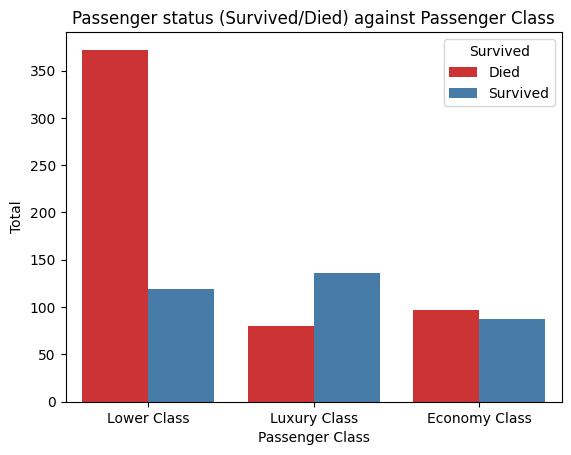

In [21]:
#Plotting graph of Survived/Dead Against Passenger Class
ax = sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1',data = titanic_df)
ax.set(title = 'Passenger status (Survived/Died) against Passenger Class',
       xlabel = 'Passenger Class', ylabel = 'Total')
plt.show() 

Survived  Died  Survived
Sex                     
female      81       233
male       468       109


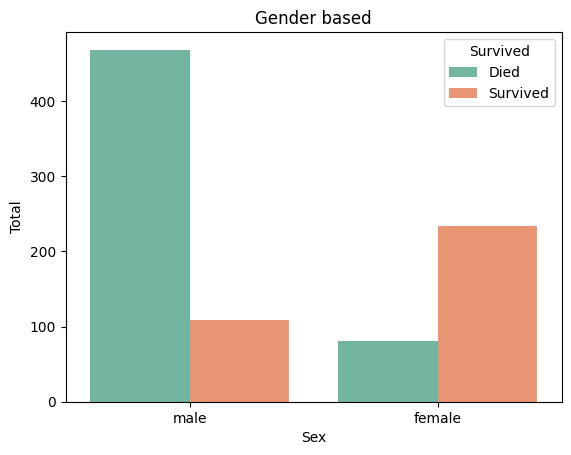

In [22]:
#Plotting graph of Survived/Dead Against Passenger Gender
#crosstab=This method is used to compute a simple cross-tabulation of two (or more) factors.
print(pd.crosstab(titanic_df['Sex'],titanic_df.Survived))
ax=sns.countplot(x='Sex',hue='Survived',palette='Set2',data=titanic_df)
ax.set(title='Gender based',xlabel='Sex',ylabel='Total')
plt.show()

Survived        Died  Survived
Age_categories                
Children          69        70
Teen             221       137
Adult            117        78
Old               17         5


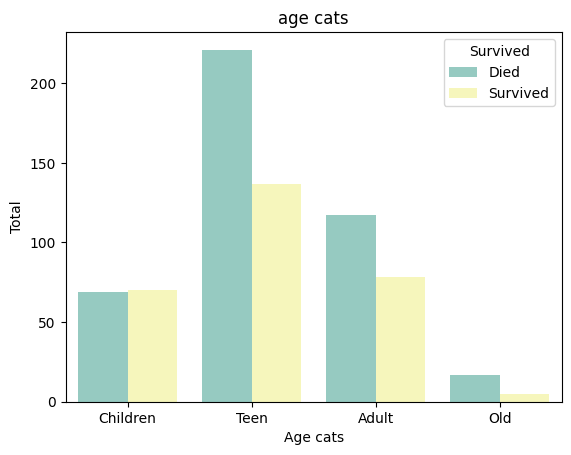

In [23]:
#Mapping age categories using cut() from pandas and
#Plotting graph of Survived/Dead Against Passenger Age Category
interval = (0,18,35,60,120)
categories = ['Children','Teen','Adult','Old']
titanic_df["Age_categories"]=pd.cut(titanic_df.Age,interval,labels=categories)
ax = sns.countplot(x="Age_categories",data=titanic_df,hue='Survived',palette='Set3')
ax.set(xlabel='Age cats',ylabel='Total',title="age cats")
print(pd.crosstab(titanic_df['Age_categories'],titanic_df.Survived))
plt.show()

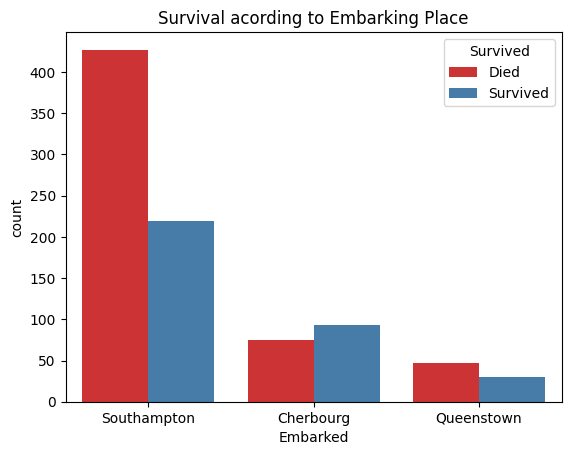

In [24]:
#Plotting graph of Survived/Dead Against Embarked place
ax = sns.countplot(x='Embarked',hue='Survived',palette='Set1',data=titanic_df)
ax.set(title='Survival acording to Embarking Place')
plt.show()